In [ ]:
 %run Cali_25_1212/load_Results_12_15a.py
%run Cali_Func_T1T2.py

In [356]:
from matplotlib.pyplot import xlim

In [373]:
def reli( pred, y , title, ax):
    #figure (figsize=(2.5,2.5))
    #a =  array([0  ,.05, 0.1 , .15,  0.2 , .25,  0.3 , .35,  0.4 , .45,0.5 ,    0.6 ,   0.7 ,  0.8 ,  0.9 ,   1 ])
    a =  array([0  ,.05, 0.1 , .15,  0.2 , .25,  0.3 , .35,  0.4 , .45,0.5  ])
    figure (figsize=(7,3.5))
    mli.plot_reliability_diagram( pred,   y,                     
                                 title_size=9,
                                 bins = a, reliability_title = title, show_histogram = True, 
                                 ax1_x_title=ax)

## Calibration Plots (Raw Probabilities)

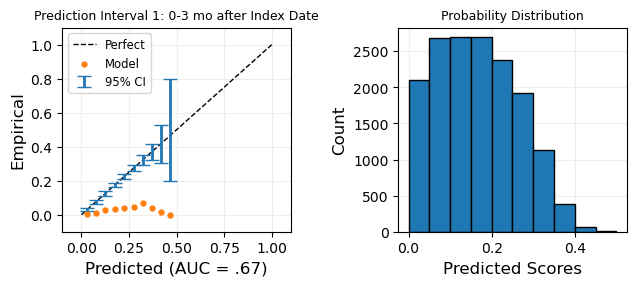

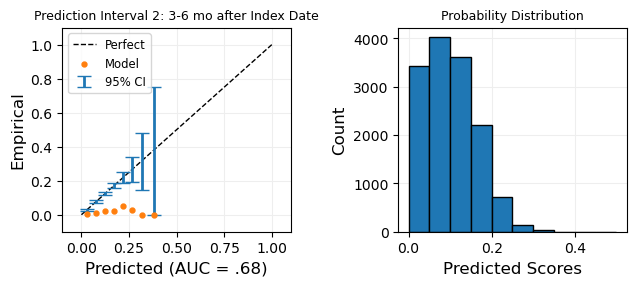

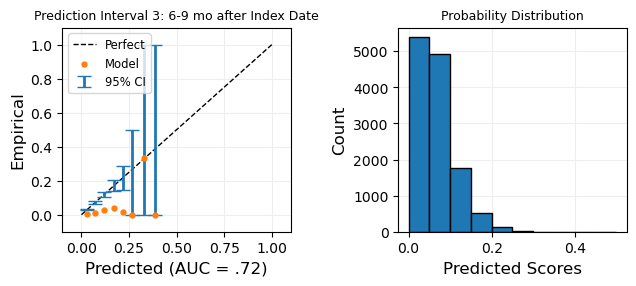

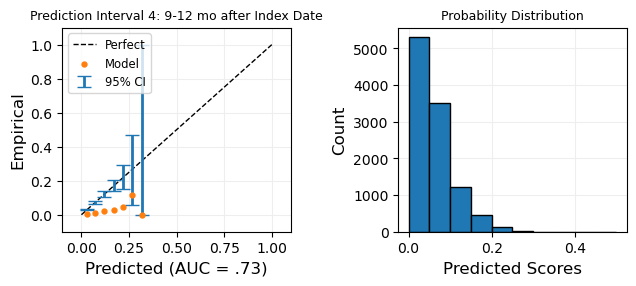

In [374]:
reli(M_test1['golds'], tp1, "Prediction Interval 1: 0-3 mo after Index Date", "Predicted (AUC = .67)")
reli(M_test2['golds'], tp2, "Prediction Interval 2: 3-6 mo after Index Date","Predicted (AUC = .68)")
reli(M_test3['golds'], tp3, "Prediction Interval 3: 6-9 mo after Index Date","Predicted (AUC = .72)")
reli(M_test4['golds'], tp4, "Prediction Interval 4: 9-12 mo after Index Date","Predicted (AUC = .73)")

{'pred_probs': array([0.03127095, 0.07549552, 0.125378  , 0.17507962, 0.22441029,
        0.27422571, 0.32136556, 0.36909183, 0.41540094, 0.46405454]),
 'emp_probs': array([0.0028463 , 0.0115758 , 0.02525065, 0.03380386, 0.03792668,
        0.0471747 , 0.06908769, 0.03947368, 0.01515152, 0.        ]),
 'bin_counts': array([2108., 2678., 2693., 2692., 2373., 1929., 1129.,  380.,   66.,
          10.])}

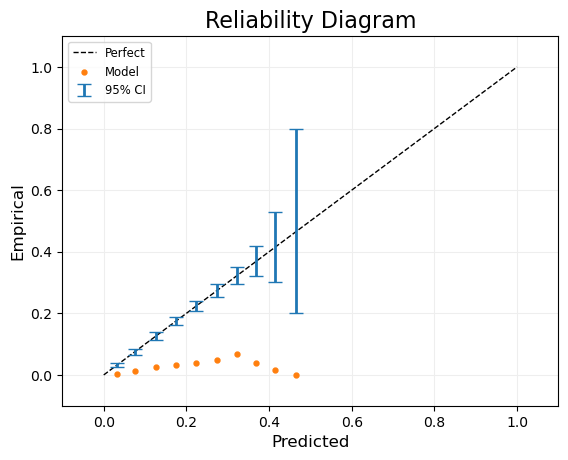

In [375]:
mli.plot_reliability_diagram( M_test1['golds'], tp1)

In [330]:
UQ1 = np.apply_along_axis(trim_upper, 1, X1)
 

In [340]:
def reli2( pred, y , title, ax):
    figure (figsize=(2.5,2.5))
    a =  array([ 0.1 , .15,  0.2 , .25,  0.3 , .35,  0.4 , .45,0.5 , .55,   0.6 ,.65,   0.7 ,  0.8, .9 ])
    figure (figsize=(7,3.5))
    mli.plot_reliability_diagram( pred,   y,                     
                                 title_size=9,
                                 bins = a, reliability_title = title, show_histogram = True, 
                                 marker_size = 120,
                                 ax1_x_title=ax,
                                 )

### Recalibrating Interval 1 (0-3 Mo past Index Date)

<Figure size 250x250 with 0 Axes>

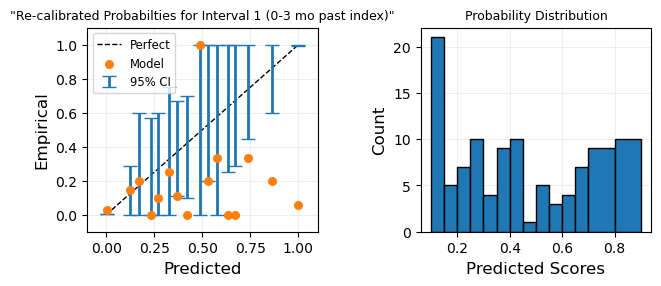

In [343]:
reli2(M_test1['golds'], UQ1,'"Re-calibrated Probabilties for Interval 1 (0-3 mo past index)"', 'Predicted')

#### Confusion Matrix (Pred Interval 1: 0-3 Months Past Index Date) 

|   | VTE+ |VTE- |
|:---------|:--------:|---------:|
|  Pred+   |  51   | 791   |
|  Pred-   | 420  |  14796  |

### Recalibrating Interval 2 (3-6 Mo past Index Date)

<Figure size 250x250 with 0 Axes>

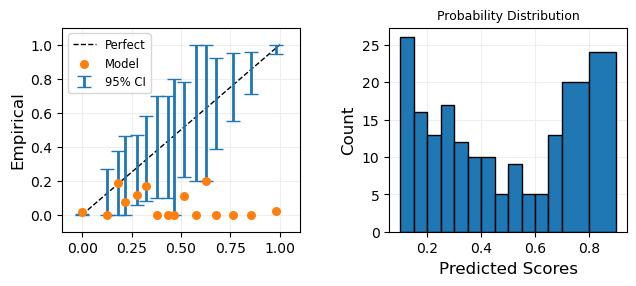

In [347]:

UQ2 = np.apply_along_axis(trim_upper_d, 1, X2) 
reli2(M_test2['golds'], UQ2, '"Re-calibrated Probabilties for Interval 2 (0-3 mo past index)"', 'Predicted')

#### Confusion Matrix (Pred Interval 2: 3-6 Months Past Index Date) 

|   | VTE+ |VTE- |
|:---------|:--------:|---------:|
|  Pred+   |  21   | 491   |
|  Pred-   | 198  |  13461  |

In [349]:
?mli.plot_reliability_diagram

Signature:
mli.plot_reliability_diagram(
    y,
    x,
    bins=array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
    show_baseline=True,
    baseline_color='black',
    baseline_width=1,
    error_bars=True,
    error_bar_color='C0',
    error_bar_alpha=0.05,
    error_bar_width=2,
    ci_ref='axis',
    marker='.',
    marker_color='C1',
    marker_edge_color='C1',
    marker_size=50,
    scaling='none',
    scaling_eps=0.0001,
    scaling_base=10,
    cap_width=1,
    cap_size=5,
    show_histogram=False,
    bin_color='C0',
    bin_edge_color='black',
    ax1_x_title='Predicted',
    ax1_y_title='Empirical',
    ax2_x_title='Predicted Scores',
    ax2_y_title='Count',
    ax_title_weight='normal',
    ax_title_size=12,
    title_size=16,
    title_weight='normal',
    reliability_title='Reliability Diagram',
    histogram_title='Probability Distribution',
    layout_pad=3.0,
    legend_names

In [214]:
np.sum( np.quantile(X2, .98, 1 ) >.5 )

512

In [205]:
 confusion_matrix (tgold2, O2a>.5 )

array([[13461,   491],
       [  198,    21]], dtype=int64)

In [245]:
def trim_99(data):
    sorted_data = np.sort(data)
    n = len(sorted_data)
    k = int(n * .3)
    return np.quantile(sorted_data[k:n], .985)

In [250]:

def med_upper(data):
    # proportiontocut=.2
    sorted_data = np.sort(data)
    n = len(sorted_data)
    k = int(n * .2)
    return np.quantile(sorted_data[0:n-k], .5)

In [298]:

def med_lower(data):
    # proportiontocut=.2
    sorted_data = np.sort(data)
    n = len(sorted_data)
    k = int(n * .2)
    return np.quantile(sorted_data[0:n-k], .5)

In [299]:
len(np.quantile(X2, .5, 1 ))

14171

In [326]:
np.mean(np.quantile(X2, .98, 1 ))

0.048292932730160755

In [320]:
np.mean(np.quantile(X2, .975, 1 ))

0.0389347716084433

In [327]:
O2a =  np.where ( np.quantile(X2, .98, 1 )>.05,       #
                 np.quantile(X2, .95, 1 ) , 
                 np.apply_along_axis(trim_upper_c, 1, X2)
                )

array([[13782,   170],
       [  215,     4]], dtype=int64)

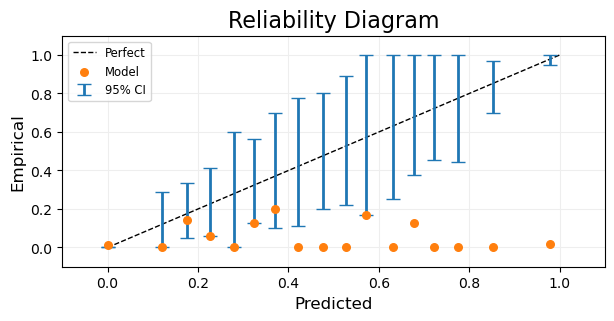

In [328]:
reli2(M_test2['golds'], O2a)
confusion_matrix (tgold2, O2a>.5 )


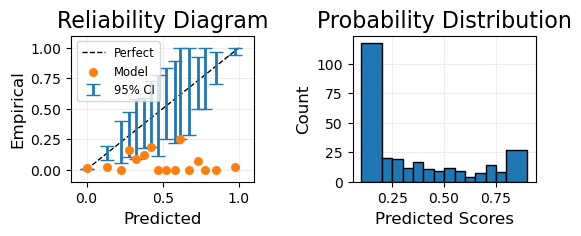

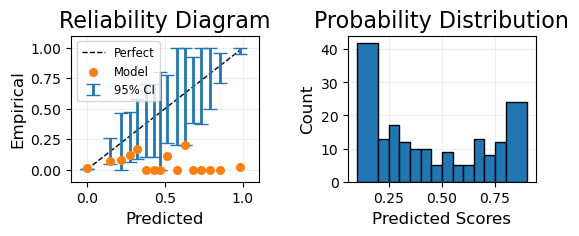

In [169]:

UQ2 = np.apply_along_axis(trim_upper_d, 1, X2)
LQ2 = np.apply_along_axis(trim_lower_d, 1, X2)
reli2(M_test2['golds'], LQ2)
reli2(M_test2['golds'], UQ2)

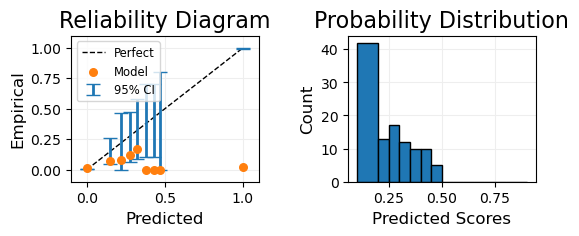

In [175]:
reli2(M_test2['golds'], O2a)


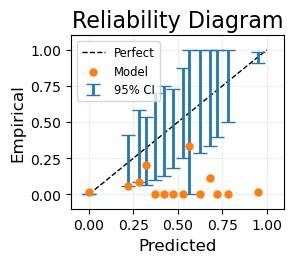

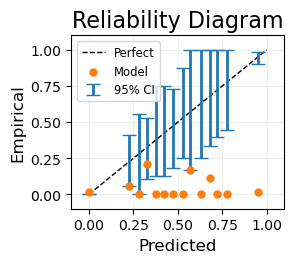

In [232]:
reli(M_test2['golds'], np.apply_along_axis(trim_upper_c, 1, X2))
reli(M_test2['golds'], np.apply_along_axis(trim_lower_c, 1, X2))

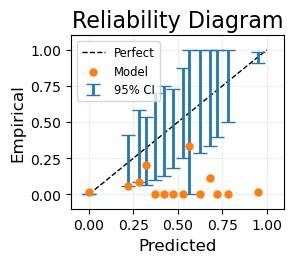

In [288]:
reli(M_test2['golds'], Q2c)

In [371]:
( confusion_matrix (tgold2,   O2a>.5) )

array([[13619,   333],
       [  205,    14]], dtype=int64)

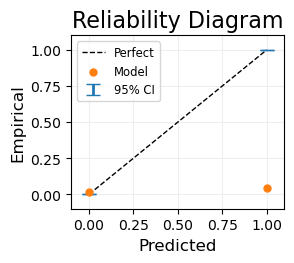

In [372]:
reli (tgold2, O2a)

In [375]:

def reli2 ( pred, y ):
    bns= array([.0,.05, .1, 0.2 , 0.25,    #0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65 ,.7, .75, .8, .9, .95, 1   ])
    figure (figsize=(2.5,2.5))
    mli.plot_reliability_diagram( pred,   y, #bins = bns, 
                                 marker_size=100, scaling='logit')

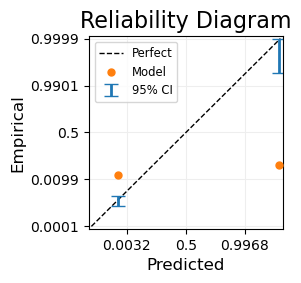

In [376]:
reli2(tgold2, O2a)

In [263]:
O2 =  np.where ( X2.mean(1)<.25, 
                np.apply_along_axis(trim_upper, 1, X2), 
                X2.max(1))

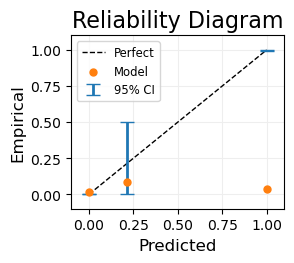

In [264]:
reli(M_test2['golds'], O2)

In [265]:
( confusion_matrix (tgold2,  O2>.5) )

array([[13729,   223],
       [  211,     8]], dtype=int64)

In [244]:
O2b =  np.where ( X2.mean(1)>.5, 
                np.apply_along_axis(trim_lower_d, 1, X2), 
                np.apply_along_axis(trim_upper_c, 1, X2))

In [245]:
( confusion_matrix (tgold2,  O2b>.5) )

array([[13784,   168],
       [  215,     4]], dtype=int64)

In [231]:
sklearn.metrics.roc_auc_score(tgold2,  tp2 , average = 'samples')


0.6764948839596163

In [ ]:
# first load 12_12 for T3, T4


In [27]:
sklearn.metrics.roc_auc_score(tgold1,  tc1 , average = 'samples')
( confusion_matrix (tgold1,  tc1>.5) )


0.6667921165559247

In [28]:
sklearn.metrics.roc_auc_score(tgold2,  tc2 , average = 'samples')


0.6764938403022082

In [29]:
sklearn.metrics.roc_auc_score(tgold3,  tc3 , average = 'samples')
( confusion_matrix (tgold3,  tc3>.5) )


0.7132108023602834

In [30]:
sklearn.metrics.roc_auc_score(tgold4,  tc4 , average = 'samples')


0.754709382855384

array([[6778, 8874],
       [  95,  385]], dtype=int64)

In [32]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[11112,  2894],
       [  133,    87]], dtype=int64)

In [33]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12240,   436],
       [  139,    14]], dtype=int64)

In [34]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[11578,     2],
       [  101,     0]], dtype=int64)

In [231]:
( confusion_matrix (tgold1,  tp1>.05) )

array([[ 1657, 13862],
       [   10,   496]], dtype=int64)

In [227]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[12250,  1605],
       [  149,    50]], dtype=int64)

In [228]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12405,    42],
       [  130,     2]], dtype=int64)

In [229]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[10584,   128],
       [   94,     4]], dtype=int64)

In [27]:
m1.to_csv('output/XCoh_Sen.csv') 

In [34]:
#m1.to_excel('output/dxMD_Sensitivity90.xlsx') 

In [39]:
y1 = np.array(M1['golds'],dtype = int)
x1 = M1['probs'].to_numpy()
platt.fit(x1, y1)
cal_1 = platt.predict(M_test1['probs'])